Adding values to the tree: [49, 38, 65, 97, 60, 76, 13, 27, 5, 1]
Inorder traversal result: [1, 5, 13, 27, 38, 49, 60, 65, 76, 97]


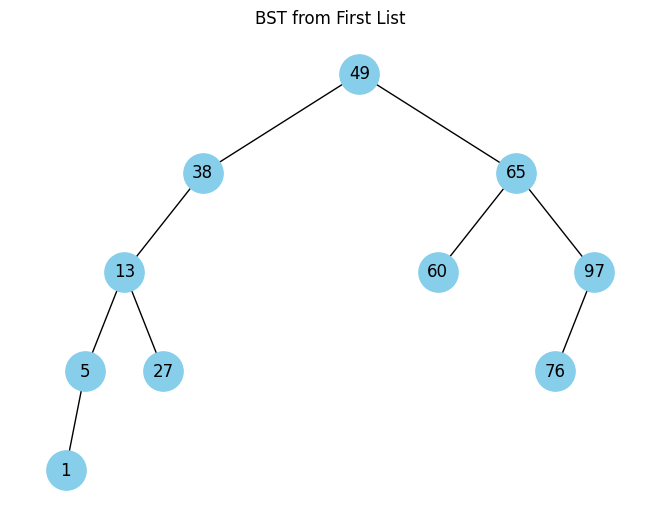

Adding values to the tree: [149, 38, 65, 197, 60, 176, 13, 217, 5, 11]
Inorder traversal result: [5, 11, 13, 38, 60, 65, 149, 176, 197, 217]


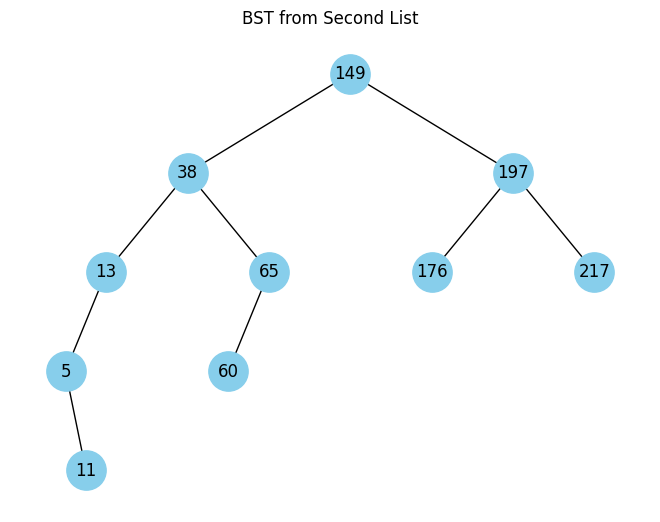

Adding values to the tree: [49, 38, 65, 97, 64, 76, 13, 77, 5, 1, 55, 50, 24]
Inorder traversal result: [1, 5, 13, 24, 38, 49, 50, 55, 64, 65, 76, 77, 97]


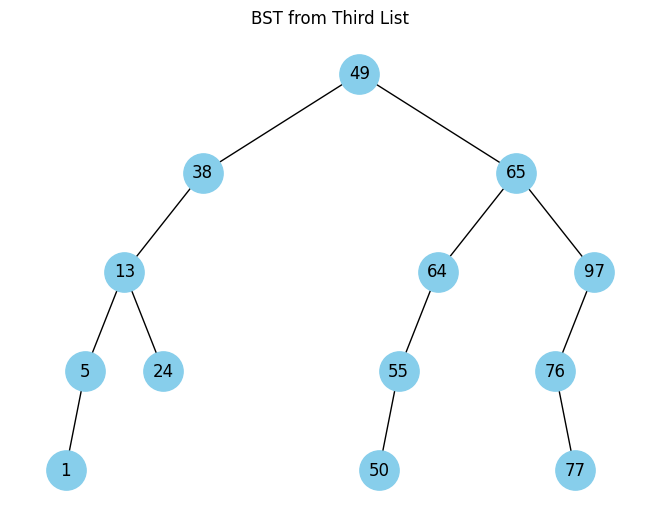

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    """Represents a single node in the binary search tree."""
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BST:
    """Binary Search Tree class with basic operations."""
    def __init__(self):
        self.root = None

    def add(self, value):
        """Adds a new value to the tree."""
        self.root = self._add_recursive(self.root, value)

    def _add_recursive(self, node, value):
        if node is None:
            return TreeNode(value)
        if value < node.value:
            node.left = self._add_recursive(node.left, value)
        elif value > node.value:
            node.right = self._add_recursive(node.right, value)
        return node

    def remove(self, value):
        """Removes a value from the tree."""
        self.root = self._remove_recursive(self.root, value)

    def _remove_recursive(self, node, value):
        if node is None:
            return None
        if value < node.value:
            node.left = self._remove_recursive(node.left, value)
        elif value > node.value:
            node.right = self._remove_recursive(node.right, value)
        else:
            if node.left is None:
                return node.right
            if node.right is None:
                return node.left
            min_larger_node = self._find_min(node.right)
            node.value = min_larger_node.value
            node.right = self._remove_recursive(node.right, min_larger_node.value)
        return node

    def _find_min(self, node):
        while node.left is not None:
            node = node.left
        return node

    def search(self, value):
        """Searches for a value in the tree."""
        return self._search_recursive(self.root, value)

    def _search_recursive(self, node, value):
        if node is None:
            return False
        if node.value == value:
            return True
        if value < node.value:
            return self._search_recursive(node.left, value)
        return self._search_recursive(node.right, value)

    def inorder(self):
        """Performs an inorder traversal and returns the values as a list."""
        result = []
        self._inorder_recursive(self.root, result)
        return result

    def _inorder_recursive(self, node, result):
        if node:
            self._inorder_recursive(node.left, result)
            result.append(node.value)
            self._inorder_recursive(node.right, result)

    def visualize(self, title="Binary Search Tree"):
        """Visualizes the tree structure."""
        G = nx.DiGraph()
        positions = self._build_graph(self.root, G)
        nx.draw(G, positions, with_labels=True, node_color='skyblue', node_size=800, arrows=False)
        plt.title(title)
        plt.show()

    def _build_graph(self, node, graph, x=0, y=0, layer=1, positions=None):
        if node is None:
            return {}
        if positions is None:
            positions = {}
        positions[node.value] = (x, y)
        if node.left:
            graph.add_edge(node.value, node.left.value)
            self._build_graph(node.left, graph, x - 1 / 2 ** layer, y - 1, layer + 1, positions)
        if node.right:
            graph.add_edge(node.value, node.right.value)
            self._build_graph(node.right, graph, x + 1 / 2 ** layer, y - 1, layer + 1, positions)
        return positions

# Example usage for testing with provided lists
def test_bst_with_list(data, title):
    tree = BST()
    print(f"Adding values to the tree: {data}")
    for num in data:
        tree.add(num)
    print("Inorder traversal result:", tree.inorder())
    tree.visualize(title)

# Lists to test
data1 = [49, 38, 65, 97, 60, 76, 13, 27, 5, 1]
data2 = [149, 38, 65, 197, 60, 176, 13, 217, 5, 11]
data3 = [49, 38, 65, 97, 64, 76, 13, 77, 5, 1, 55, 50, 24]

test_bst_with_list(data1, "BST from First List")
test_bst_with_list(data2, "BST from Second List")
test_bst_with_list(data3, "BST from Third List")
